<a href="https://colab.research.google.com/github/Nithie-code/K-means/blob/main/UnsupervisedLearning_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we develop  an unsupervised Learning method named K-means. We evaluate the method employing inertia & silhouette score

In [2]:
# imports : Operational packages
import pandas as  pd
import numpy as np
## imports for modeling and evalation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
##imports visualization packages
import seaborn as sns
### imports  to create synthetic data
from sklearn.datasets import make_blobs




**Create the data**

In [9]:
# Create random number generator
rng = np.random.default_rng(seed=44)
#create synthetic data with unknown symbols
centers=rng.integers(low=3,high=7)
X,y=make_blobs(n_samples=1000,n_features=8,centers=centers,random_state=42)
#create Dataframe
X=pd.DataFrame(X)
#visualize
X.head(5)

,0,1,2,3,4,5,6,7
0,-4.486901,0.827736,-0.427972,-4.398138,3.302230,-5.757506,-5.073428,-3.509684
1,-3.034008,0.496454,-0.965679,-5.132986,1.647726,-7.668761,-3.300405,-0.995386
2,-7.733641,9.682047,11.164681,5.750164,-5.005336,-8.408186,5.120232,-3.025356
3,-2.534752,10.187015,5.183479,1.602555,-6.107928,-9.728652,-7.689562,5.583809
4,-7.609432,11.343119,7.873921,5.942684,-6.286156,-7.853906,4.050055,-1.236112


**Scale the Data**

In [11]:
#StandardScaler scales each point xᵢ by subtracting the mean value for that feature and dividing by the standard deviation:x-scaled = (xᵢ – mean(x)) / σ
# Scale the data
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:2,:]

array([[-0.45793513, -1.42077967,  0.02954254, -1.47853899,  0.66675198,
         1.08442627, -0.47706867, -0.32150213],
       [-0.06301693, -1.51860612, -0.04735937, -1.6312287 ,  0.32835362,
        -0.17506422, -0.11730542,  0.16894928]])

**Instantiate the Model**

In [12]:
# Instantiate model
kmeans1 = KMeans(n_clusters=3, random_state=42)

**Fit the Model**

In [13]:
# Fit the model
kmeans1.fit(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [15]:
#
print('Clusters: ', kmeans1.labels_)
print('Inertia: ', kmeans1.inertia_)

Clusters:  [1 1 2 2 2 1 1 1 0 2 0 2 0 0 2 1 0 2 2 2 0 1 1 1 0 1 2 1 2 2 2 0 2 2 2 1 1
 1 0 2 0 2 1 2 2 1 2 2 1 1 2 0 2 2 0 2 1 2 1 1 0 2 1 1 2 2 2 1 0 2 2 1 1 0
 2 2 1 2 0 0 1 2 1 2 1 2 1 0 2 2 2 1 1 1 1 1 2 1 1 2 1 2 0 1 0 2 0 2 2 2 2
 2 0 1 1 1 1 1 2 2 0 2 2 2 1 2 1 0 2 1 0 2 0 0 1 1 2 2 1 2 2 0 1 2 2 2 1 0
 1 2 1 2 0 2 1 2 0 2 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 2 0 2 2 0 1 2 1 2 1 1 0
 2 1 1 2 2 2 2 0 2 0 2 2 0 1 0 1 2 0 1 2 2 2 2 1 0 2 0 0 2 2 1 0 1 1 1 2 1
 2 1 1 1 2 1 1 1 1 0 2 1 0 1 0 1 1 2 1 0 0 2 2 2 1 1 1 1 2 2 1 0 2 1 1 1 1
 1 0 1 2 2 1 1 2 2 1 1 0 1 2 1 1 0 1 2 2 2 1 2 0 2 2 1 1 1 1 1 0 1 2 2 0 2
 2 0 0 2 1 1 0 1 0 2 2 1 2 2 1 1 1 1 2 2 2 0 0 0 1 1 1 2 2 2 0 0 1 2 2 2 1
 2 1 0 2 2 1 0 2 1 0 0 0 2 2 1 1 1 2 1 0 2 0 2 0 2 2 2 2 0 2 1 2 1 2 1 0 1
 2 1 1 1 1 1 2 2 2 0 1 1 1 1 1 1 1 1 2 2 1 2 2 0 2 1 0 2 2 2 2 1 2 2 2 1 2
 2 2 2 1 2 1 2 1 1 1 0 1 2 1 2 1 2 0 2 0 0 2 1 1 1 2 1 1 2 1 1 2 1 2 2 0 0
 2 0 2 1 1 2 1 0 1 0 1 2 0 2 1 0 0 1 2 1 1 1 1 0 1 2 1 2 2 2 2 0 1 0 1 1 2
 2 2 1 2 0 2 1

**Evaluate inertia**

In [16]:
# we know that the  inertia score isn't helpful by itself thus we need to evaluate it
# Create a list from 2-10.
num_clusters = [i for i in range(2, 11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)

    return inertia

In [21]:
#Calculate inertia for k=2-10
inertia=kmeans_inertia(num_clusters,X_scaled)
print("Inertia score:")
print("*************")
inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Inertia score:
*************


[4678.004903408388,
 3016.287030536213,
 1609.8039986287654,
 793.6500722981061,
 727.0106399094848,
 672.3592584718573,
 612.6511014557728,
 558.0839466980009,
 508.72285147861396]

**Elbow Plot**

Text(0.5, 1.0, 'Inertia vs # of Clusters')

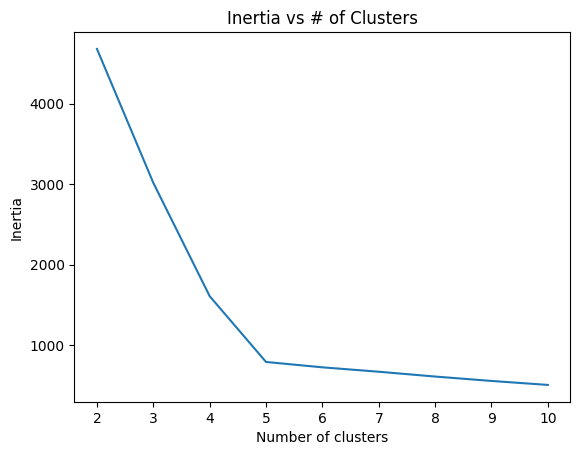

In [23]:
#Create an elbow plot
plot = sns.lineplot(x=num_clusters,y=inertia)
plot.set_xlabel("Number of clusters")
plot.set_ylabel("Inertia")
plot.set_title("Inertia vs # of Clusters")

This figure depicts that model with more than five clusters doesn't seem to reduce inertia much at all. we can conclude that  a 5-cluster model might be optimal.

**Evaluate silhouette score**

In [29]:
# Get silhouette score for kmeans3 model
kmeans1_sil_score = silhouette_score(X_scaled, kmeans1.labels_)
print('Silhouette Score: ')
kmeans1_sil_score

Silhouette Score: 


0.49335828624002037

Similarly to inertia score, the silhouette score doesn't mean anything alone therefore we compore it with each value of k, from 2 through 10.

In [27]:
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns:
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''

    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))

    return sil_score

In [ ]:
# Calculate silhouette scores for k=2-10
sil_score = kmeans_sil(num_clusters, X_scaled)
print("Silhouette Score: ", sil_score)

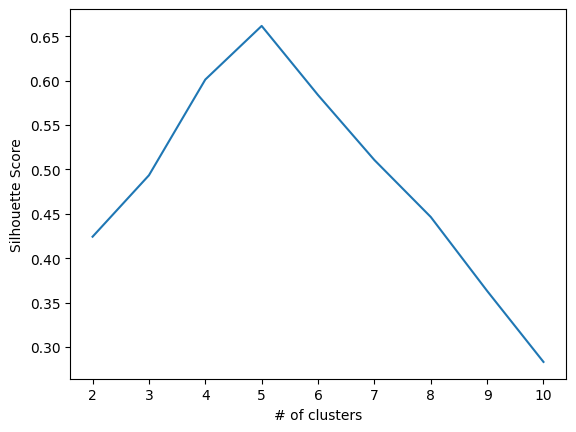

In [30]:
# Create a line plot of silhouette scores
plot = sns.lineplot(x=num_clusters, y=sil_score)
plot.set_xlabel("# of clusters");
plot.set_ylabel("Silhouette Score");

This figure  confirms what we saw in the inertia analysis, where we noticed an elbow where k=5. Therefore,between our inertia and silhouette score analyses, we can say with a reasonable degree of confidence that it makes the most sense to group our data into five cluster

In [32]:
# let us confirm our analysis
print("center is  :",centers)


center is  : 5


In [ ]:
# Fit a 5-cluster model to the data
kmeans5 = KMeans(n_clusters=5, random_state=42)
kmeans5.fit(X_scaled)

In [34]:
print(kmeans5.labels_[:5])
print('Unique labels:', np.unique(kmeans5.labels_))

[1 1 3 2 3]
Unique labels: [0 1 2 3 4]


In [35]:
# Create new column that indicates cluster assignment in original dataframe
X['cluster'] = kmeans5.labels_
X.head()

,0,1,2,3,4,5,6,7,cluster
0,-4.486901,0.827736,-0.427972,-4.398138,3.302230,-5.757506,-5.073428,-3.509684,1
1,-3.034008,0.496454,-0.965679,-5.132986,1.647726,-7.668761,-3.300405,-0.995386,1
2,-7.733641,9.682047,11.164681,5.750164,-5.005336,-8.408186,5.120232,-3.025356,3
3,-2.534752,10.187015,5.183479,1.602555,-6.107928,-9.728652,-7.689562,5.583809,2
4,-7.609432,11.343119,7.873921,5.942684,-6.286156,-7.853906,4.050055,-1.236112,3


**Predict  new data**

In [38]:
# Create a new observation (for demonstration)
new_observation = rng.uniform(low=-10, high=10, size=8).reshape(1, -1)
new_observation

array([[-3.24076102,  3.55445635,  2.33068343,  9.09872328, -1.77198438,
         8.79283624,  8.53497386,  4.31143484]])

In [39]:
# Instantiate the scaler and fit it to the original X data
scaler = StandardScaler().fit(X.iloc[:,:-1])

# Apply the scaler to the new observation
new_observation_scaled = scaler.transform(new_observation)
new_observation_scaled

array([[-0.11921541, -0.61558802,  0.42408047,  1.3258928 , -0.37108509,
        10.67289781,  2.28420505,  1.20412411]])

In [40]:
# Predict cluster assignment of new_observation
new_prediction = kmeans5.predict(new_observation_scaled)
new_prediction

array([0], dtype=int32)

**Determine the distance to each centroid**

In [41]:
# Calculate distances between new data and each centroid
distances = kmeans5.transform(new_observation_scaled)
distances

array([[10.63624657, 11.3995834 , 11.18683845, 11.46031327, 12.3167428 ]])